In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cvxopt
import itertools

The general convex optimization problem is:
\begin{equation}
\begin{aligned}
\text{minimize } & \frac{1}{2} \mathbf{x}^T \mathbf{P} \mathbf{x} + \mathbf{q}^T\mathbf{x} \\
\text{subject to } & \mathbf{G}\mathbf{x} \leq \mathbf{h} \\
& \mathbf{A}\mathbf{x} = \mathbf{b}.
\end{aligned}
\end{equation}

In the general (soft or hard margin) SVDD formulation, the equations given in Tax, 2004 are as follows:
\begin{equation}
\begin{aligned}
\max_\mathbf{a} \text{ } & \mathcal{L}(\mathbf{a}) = \sum_{n=1}^{N}a_n k(\mathbf{x}_n, \mathbf{x}_n) - \frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^N a_n a_m k(\mathbf{x}_n, \mathbf{x}_m), \\
&\text{such that } 0 \leq a_n \leq \delta C \\
& \text{and } \sum_{n=1}^N a_i = 2  \\
\end{aligned}
\end{equation}

There is also a formulation for SVDD that includes negative samples, I believe that this should hold for RSVDD. The derivation is slightly more involved, but at the end of the derivation it is revealed that if one defines a variable $a^{'}_i$ as $a^{'}_i = y_i a_i$, we can simply reformulate the problem as 
\begin{equation}
\begin{aligned}
\max_\mathbf{a}^{'} \text{ } & \mathcal{L}(\mathbf{a}^{'}) = \sum_{n=1}^{N}a^{'}_n k(\mathbf{x}_n, \mathbf{x}_n) - \frac{1}{2}\sum_{n=1}^{N}\sum_{m=1}^N a^{'}_n a^{'}_m k(\mathbf{x}_n, \mathbf{x}_m), \\
&\text{such that } 0 \leq a^{'}_n \leq \delta C \\
& \text{and } \sum_{n=1}^N a^{'}_i = 2  \\
\end{aligned}
\end{equation}

Note that the variable $y_i \in \{-1, 1\}$, and $y_i=-1$ is given to samples that the radius should not encompass. Finally, we can calculate the centroid $\alpha$ using
\begin{equation}
\boldsymbol\alpha = \sum a^{'}_i \mathbf{x_i}.
\end{equation}

If we test new data, we can do so using the radius $R_L$ and $R_U$, with the formula for $R_L$ given as
\begin{equation}
R_L^2 = k(\mathbf{x}_l, \mathbf{x}_l) - 2 \sum_i a^{'}_i k(\mathbf{x}_i, \mathbf{x}_l) + \sum_{i}\sum_{j} k(\mathbf{x}_i, \mathbf{x}_j)
\end{equation}
where $\mathbf{x}_l \in LBSVs, \mathbf{x}_i, \mathbf{x}_j \in SVs$.

Furthermore, we can also determine $R_U$ formula
\begin{equation}
R_U^2 = k(\mathbf{x}_u, \mathbf{x}_u) - 2 \sum_i a^{'}_i k(\mathbf{x}_i, \mathbf{x}_u) + \sum_{i}\sum_{j} k(\mathbf{x}_i, \mathbf{x}_j)
\end{equation}
where $\mathbf{x}_u \in UBSVs, \mathbf{x}_i, \mathbf{x}_j \in SVs$.

where $\mathbf{x}_k$ is any support vector. This radius is used to test new data using:
\begin{equation}
\Vert \mathbf{z} - \boldsymbol\alpha \Vert_2^2 = k(\mathbf{z}, \mathbf{z}) - 2 \sum_i a^{'}_i k(\mathbf{z}, \mathbf{x}_k) + \sum_{i}\sum_{j} k(\mathbf{x}_i, \mathbf{x}_j) \leq R_L^2
\end{equation}

we can subtract $R_L^2 - \Vert \mathbf{z} - \boldsymbol\alpha \Vert_2^2$ to produce a positive value if a test sample is in the decision boundary, or a negative value otherwise.

We can immediately see that we can rewrite this to be suitable to the convex optimisation problem: let us reformulate the convex problem with $\mathbf{x} = \mathbf{a}$ to give the following matrices (let $\otimes$ be the outer product)

\begin{equation}
\mathbf{P} = \mathbf{K}(X),
\end{equation}
where $\mathbf{K}$ is the gram matrix:
\begin{equation}
K_{ij} = k(\mathbf{x}_i, \mathbf{x}_j),
\end{equation}

Furthermore, $\mathbf{q}$ is simply:
\begin{equation}
\mathbf{q} = -\text{diag}(\mathbf{K}).
\end{equation}

If we solve to hard margin problem ($C = \infty$, $a_n \geq 0$), then $\mathbf{G}$ is simply the negative identify matrix.
\begin{equation}
\mathbf{G}_{hard} = - \mathbf{I}
\end{equation}
and $\mathbf{h}$ is simply a zero vector
\begin{equation}
\mathbf{h} = \mathbf{0}.
\end{equation}

However, if we solve to soft margin problem ($0\leq a_n \leq C$), $\mathbf{G}$ and $\mathbf{h}$ become
\begin{equation}
\mathbf{G}_{soft} = [\mathbf{G_1}, \mathbf{G_2}]^T
\end{equation}
\begin{equation}
\mathbf{G_1} = -\mathbf{I}
\end{equation}
\begin{equation}
\mathbf{G_2} = \mathbf{I}
\end{equation}
\begin{equation}
\mathbf{h} = [\mathbf{h}_1, \mathbf{h}_2]^T
\end{equation}
\begin{equation}
\mathbf{h}_1 = \mathbf{0}
\end{equation}
\begin{equation}
\mathbf{h}_2 = \delta C * \mathbf{1}
\end{equation}

Finally, the final equality constraint is simple, as both $\mathbf{A} = \mathbf{1}$, where $\mathbf{A}$ is the one vector and $\mathbf{b} = 1$.

We can also demonstrate how the convex problem is formulated for $a^{'}_i = y_ia_i$: let us reformulate the convex problem with $\mathbf{x} = \mathbf{a}$ to give the following matrices (let $\otimes$ be the outer product):
\begin{equation}
\mathbf{P} = \mathbf{t}\otimes \mathbf{t} * \mathbf{K}(X),
\end{equation}
where $\mathbf{K}$ is the gram matrix:
\begin{equation}
K_{ij} = k(\mathbf{x}_i, \mathbf{x}_j),
\end{equation}

Furthermore, $\mathbf{q}$ is simply:
\begin{equation}
\mathbf{q} = -\mathbf{t} * \text{diag}(\mathbf{K}).T.
\end{equation}

If we solve to hard margin problem ($C = \infty$, $a_n \geq 0$), then $\mathbf{G}$ is simply the negative diagonal matrix with $\mathbf{t}$ on the diagonal.
\begin{equation}
\mathbf{G}_{hard} = - \text{diag}(\mathbf{t})
\end{equation}
and $\mathbf{h}$ is simply a zero vector
\begin{equation}
\mathbf{h} = \mathbf{0}.
\end{equation}

However, if we solve to soft margin problem ($0\leq a_n \leq C$), $\mathbf{G}$ and $\mathbf{h}$ become
\begin{equation}
\mathbf{G}_{soft} = [\mathbf{G_1}, \mathbf{G_2}]^T
\end{equation}
\begin{equation}
\mathbf{G_1} = -\text{diag}(\mathbf{t})
\end{equation}
\begin{equation}
\mathbf{G_2} = \text{diag}(\mathbf{t})
\end{equation}
\begin{equation}
\mathbf{h} = [\mathbf{h}_1, \mathbf{h}_2]^T
\end{equation}
\begin{equation}
\mathbf{h}_1 = \mathbf{0}
\end{equation}
\begin{equation}
\mathbf{h}_2 = \delta C * \mathbf{1}
\end{equation}

Finally, the final equality constraint is simple, as both $\mathbf{A} = \mathbf{1}$, where $\mathbf{A}$ is the one vector and $\mathbf{b} = 2$.

In [2]:
class RSVDD(object):
    def __init__(self, kernel = 'linear', degree = 3, sigma = 1, C = None, delta = 1, alpha_threshold = 1e-5):
        
        self.kernel = kernel
        self.degree = degree #polynomial kernel degree
        self.sigma = sigma #Gaussian kernel 1/variance
        self.C = C
        self.delta = delta #Scale on C, must be greater than 1
        self.alpha_threshold = alpha_threshold

    def linear_kernel(self, x1, x2):
        return np.dot(x1, x2)
    
    def polynomial_kernel(self, x1, x2):
        return (1 + np.dot(x1, x2)) **self.degree
    
    def gaussian_kernel(self, x1, x2):
        return np.exp(-1 * (np.linalg.norm(x1 - x2)**2) / self.sigma**2 )
    
    def apply_kernel_function(self, x1, x2):
        
        if self.kernel == 'linear':
            return self.linear_kernel(x1, x2)
        
        elif self.kernel == 'polynomial':
            return self.polynomial_kernel(x1, x2)
            
        elif self.kernel == 'gaussian':
            return self.gaussian_kernel(x1, x2)
        
        else:
            print("Illegal kernel function chosen.")
            raise SystemExit
    
    def calculate_gram(self, X):
        n, f = X.shape
        
        K = np.zeros((n, n))
        
        for i in range(n):
            for j in range(n):
                K[i, j] = self.apply_kernel_function(X[i, :], X[j, :])
        
        return K
    
    def calculate_max_dist(self, X):
        n, f = X.shape
        
        dist_mat = np.zeros((n, n))
        
        for i in range(n):
            for j in range(n):
                dist_mat[i, j] = np.linalg.norm(X[i, :] - X[j, :])**2
        
        return np.max(np.sqrt(dist_mat))
    
    def fit(self, X, y = None):
        
        #labels can be None, but 
        n = X.shape[0]
        
        if y is None:
            y = np.ones(n)
            
        else:
            assert len(y) == n
        
        #Determine gram matrix
        Gram = self.calculate_gram(X)
        
        #Setup necessary matrices to be used for lagrangian multipliers
        #P and q
        
        P = cvxopt.matrix(np.outer(y, y) *  Gram)
        q = cvxopt.matrix(-1 * y.reshape(-1, 1) * np.diag(Gram).reshape(-1, 1))
        
        #G and h
        if self.C is None:
            print("\nSolving the hard margin problem (may be undefined in this case, I am not sure).")
            G = cvxopt.matrix(-1 * np.diag(y))
            h = cvxopt.matrix(np.zeros((n, 1)))
            
        else:
            print("\nSolving the soft margin problem!")
            G_1 = -1 * np.diag(y)
            h_1 = np.zeros((n, 1))
            
            G_2 = np.diag(y)
            h_2 = self.delta * self.C * np.ones((n, 1))
            
            G = cvxopt.matrix(np.vstack((G_1, G_2)))
            h = cvxopt.matrix(np.vstack((h_1, h_2)))
        
        #A and b
        A = cvxopt.matrix(y.reshape(1, -1))
        b = cvxopt.matrix(2 * np.ones((1, 1)))
        
        #We are now ready to solve the convex optimisation problem!
        self.solution = cvxopt.solvers.qp(P, q, G, h, A, b)  
        print(self.solution)
        
        #Save alphas
        self.alphas = np.array(self.solution['x'])[:, 0]
        
        #Setup index lists!
        support_alpha_indices = []
        LB_support_alpha_indices = []
        UB_support_alpha_indices = []
        
        for cnt, i in enumerate(self.alphas):
            if i > self.alpha_threshold:
                support_alpha_indices.append(cnt)
                
                if i < self.C:
                    LB_support_alpha_indices.append(cnt)
            
                elif i > self.C and i < self.delta * self.C:
                    UB_support_alpha_indices.append(cnt)
        
        #All alphas
        self.support_alpha_indices = np.array(support_alpha_indices)
        self.support_alphas = self.alphas[self.support_alpha_indices]
        self.support_vectors = X[self.support_alpha_indices, :]
        self.support_labels = y[self.support_alpha_indices]
        self.sv_weights = self.support_alphas * self.support_labels #alpha_prime for sv's
        self.error = len(self.support_alphas) / n
        
        if len(LB_support_alpha_indices) == 0:
            LB_flag = False
        
        else:
            LB_flag = True
        
        if len(UB_support_alpha_indices) == 0:
            UB_flag = False
        
        else:
            UB_flag = True
        
        if LB_flag:
            #LB alphas
            self.LB_support_alpha_indices = np.array(LB_support_alpha_indices)
            self.LB_support_alphas = self.alphas[self.LB_support_alpha_indices]
            self.LB_support_vectors = X[self.LB_support_alpha_indices, :]
            self.LB_support_labels = y[self.LB_support_alpha_indices]
            self.LB_sv_weights = self.LB_support_alphas * self.LB_support_labels #alpha_prime for lbsv's

            #print(self.support_alpha_indices, self.LB_support_alpha_indices, self.UB_support_alpha_indices)

            #Calculate center
            self.center = np.sum(self.sv_weights.reshape(-1, 1) * self.support_vectors, axis = 0)

            #######################
            #Calculate radius R_L^2
            LB_sv_index = 0 #Use first support vector to compute radius

            #actual index:
            actual_index = self.LB_support_alpha_indices[LB_sv_index]

            #local index within all SVs:
            local_index = np.nonzero(self.support_alpha_indices == actual_index)[0][0]

            #print(actual_index, local_index)

            #Compute sv_gram (will simply model evaluation and prediction)
            self.Gram_svs = self.calculate_gram(self.support_vectors)

            t1 = Gram[actual_index, actual_index]
            t2 = -1 * np.dot(self.sv_weights, self.Gram_svs[local_index, :]) #Use local index
            t3 = 1/4 * np.dot(self.sv_weights.reshape(-1, 1).T, np.dot(self.Gram_svs, self.sv_weights.reshape(-1, 1)))

            self.square_radius_L = t1 + t2 + t3
        
                
        if UB_flag:
            #UB alphas
            self.UB_support_alpha_indices = np.array(UB_support_alpha_indices)
            self.UB_support_alphas = self.alphas[self.UB_support_alpha_indices]
            self.UB_support_vectors = X[self.UB_support_alpha_indices, :]
            self.UB_support_labels = y[self.UB_support_alpha_indices]
            self.UB_sv_weights = self.UB_support_alphas * self.UB_support_labels #alpha_prime for lbsv's
            
            ########################
            #Calculate radius R_U^2
            UB_sv_index = 0 #Use first support vector to compute radius

            #actual index:
            actual_index = self.UB_support_alpha_indices[UB_sv_index]

            #local index within all SVs:
            local_index = np.nonzero(self.support_alpha_indices == actual_index)[0][0]

            #print(actual_index, local_index)

            #Compute sv_gram (will simply model evaluation and prediction)
            self.Gram_svs = self.calculate_gram(self.support_vectors)

            t1 = Gram[actual_index, actual_index]
            t2 = -1 * np.dot(self.sv_weights, self.Gram_svs[local_index, :]) #Use local index
            t3 = 1/4 * np.dot(self.sv_weights.reshape(-1, 1).T, np.dot(self.Gram_svs, self.sv_weights.reshape(-1, 1)))

            self.square_radius_U = t1 + t2 + t3
        
        else:
            self.square_radius_U = self.square_radius_L
        
        if not LB_flag:
            self.square_radius_L = self.square_radius_U
        
        if not LB_flag and not UB_flag:
            print("Both the LB and the UB cannot be used... what happened?")
            raise SystemExit
        
        #Compute cost for grid search
        self.cost = np.sqrt(self.error**2 + np.abs(1 - self.square_radius_L)**2)
        
    def evaluate_model(self, x, lower = True):
        #X = (N,) array
        
        pred_val = 0
        
        t1_pred = self.apply_kernel_function(x, x)
        
        t2_pred = 0
        
        for cnt, i in enumerate(self.sv_weights):
            t2_pred += i * self.apply_kernel_function(x, self.support_vectors[cnt, :])
        
        t2_pred *= -1
        
        t3_pred = 1/4 * np.dot(self.sv_weights.reshape(-1, 1).T, np.dot(self.Gram_svs, self.sv_weights.reshape(-1, 1)))
        
        return t1_pred + t2_pred + t3_pred
    
    def predict(self, X, lower = True):
        
        if lower:
            rad = self.square_radius_L
        else:
            rad = self.square_radius_U
            
        if len(X.shape) > 1:

            n = X.shape[0]
            prediction = np.zeros(n)

            for i in range(n):
                prediction[i] = rad - self.evaluate_model(X[i, :])

        else:
            prediction = rad - self.evaluate_model(X)

        return prediction
    
    def optimise_parameters(self, X, y = None, sigma_low = 1e-4, C_opt = True, N_iter = 50, plot_flag = False):
        #We do not optimise C here, but rather delta
        max_sigma = self.calculate_max_dist(X)
        
        print(max_sigma)
        
        sigma_range = np.linspace(sigma_low, max_sigma, N_iter)
        
        if C_opt:
            N = X.shape[0]
            delta_range = np.linspace(2/N, 2, N_iter) / self.C  #2/N leq \delta C leq 2
            
        else:
            delta_range = np.array([self.delta])
            
        iter_list = list(itertools.product(delta_range, sigma_range))
        
        error_array = np.zeros(len(iter_list))
        
        self.orig_params = self.get_params()
        
        for cnt, i in enumerate(iter_list):
            
            print("\nBeginning optimisation iteration {}...".format(cnt + 1))
            
            self.delta = i[0]
            self.sigma = i[1]
            
            self.fit(X, y)
            error_array[cnt] = self.cost
        
        self.opt_errors = error_array
        
        opt_index = np.argmin(error_array)
        
        opt_dict = {"C":self.C, "delta":iter_list[opt_index][0], "sigma":iter_list[opt_index][1]}
        
        self.opt_params = opt_dict
        
        #Visualise
        if plot_flag:
            if C_opt:
                x_vis, y_vis = np.meshgrid(delta_range * self.C, sigma_range)
                
                plt.figure()
                plt.contourf(x_vis, y_vis, self.opt_errors.reshape(N_iter, N_iter))
                plt.xlabel(r"$\delta C$")
                plt.ylabel(r"$\sigma$")
                plt.show()
                
            else:
                plt.figure()
                plt.plot(sigma_range, self.opt_errors)
                plt.xlabel(r"$\sigma$")
                plt.ylabel("Objective")
                plt.show()
        
        return opt_dict #C, sigma
    
    def get_params(self):
        param_dict = {"C":self.C, "delta":self.delta, "sigma":self.sigma}
        return param_dict
    
    def set_params(self, param_dict):
        self.C = param_dict["C"]
        self.delta = param_dict["delta"]
        self.sigma = param_dict["sigma"]


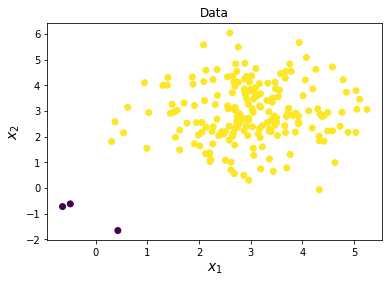

In [3]:
N1 = 200
N2 = 3

X1 = np.random.randn(N1, 2) + np.array([3, 3])
X2 = np.random.randn(N2, 2) + np.array([-0.5, -0.5])

l1 = np.ones(N1)
l2 = -1 * np.ones(N2)
X = np.vstack((X1, X2))
labels = np.hstack((l1, l2))


plt.figure()
plt.title("Data")
plt.scatter(X[:, 0], X[:, 1], c = labels)
plt.xlabel(r"$x_1$", fontsize = 14)
plt.ylabel(r"$x_2$", fontsize = 14)
plt.show()

## Fit without labels

8.11947954243439

Beginning optimisation iteration 1...

Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -1.9901e+00 -3.9901e+00  4e+02  2e+01  1e-16
 1: -1.9901e+00 -3.9517e+00  6e+00  2e-01  1e-16
 2: -1.9901e+00 -2.5091e+00  5e-01  2e-03  1e-16
 3: -1.9901e+00 -1.9954e+00  5e-03  2e-05  4e-16
 4: -1.9901e+00 -1.9902e+00  5e-05  2e-07  2e-16
 5: -1.9901e+00 -1.9901e+00  5e-07  2e-09  2e-16
Optimal solution found.
{'x': <203x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <406x1 matrix, tc='d'>, 'z': <406x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 5.447760595298157e-07, 'relative gap': 2.737364853578034e-07, 'primal objective': -1.9901477832512313, 'dual objective': -1.990148307394514, 'primal infeasibility': 2.0149445618773233e-09, 'dual infeasibility': 2.220446049250313e-16, 'primal slack': 1.0000000000000044e-10, 'dual slack': 2.6207164331874453e-07, 'iterations': 5}

Beginning optimisation iteration 2...

Solving the soft margin problem!


Beginning optimisation iteration 10...

Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -5.4929e-01 -2.5494e+00  6e+02  2e+01  5e-16
 1: -2.0040e-01 -2.4433e+00  2e+01  7e-01  6e-16
 2: -1.4486e-01 -1.5992e+00  2e+00  3e-02  8e-16
 3: -1.3914e-01 -1.9608e-01  6e-02  6e-04  2e-15
 4: -1.3916e-01 -1.3974e-01  6e-04  6e-06  8e-16
 5: -1.3916e-01 -1.3917e-01  6e-06  6e-08  6e-16
 6: -1.3916e-01 -1.3916e-01  6e-08  6e-10  8e-16
Optimal solution found.
{'x': <203x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <406x1 matrix, tc='d'>, 'z': <406x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 6.419742310469763e-08, 'relative gap': 4.6130727001182685e-07, 'primal objective': -0.13916412612151496, 'dual objective': -0.13916418330342356, 'primal infeasibility': 5.775314022475063e-10, 'dual infeasibility': 7.726505992969785e-16, 'primal slack': 1.4106753921596512e-11, 'dual slack': 2.0436353204907496e-08, 'iterations': 6}

Beginning optimisation iteration 11


Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -8.1419e-01 -4.9070e+01  5e+02  6e+00  5e-16
 1: -5.0178e-01 -3.4091e+01  4e+01  6e-02  6e-16
 2: -4.7027e-01 -4.4640e+00  4e+00  6e-03  5e-16
 3: -6.1056e-01 -1.4665e+00  9e-01  4e-04  6e-16
 4: -7.1195e-01 -1.0933e+00  4e-01  2e-16  6e-16
 5: -7.3982e-01 -9.8845e-01  2e-01  7e-16  5e-16
 6: -7.7707e-01 -8.8767e-01  1e-01  2e-16  5e-16
 7: -8.0193e-01 -8.4430e-01  4e-02  3e-16  6e-16
 8: -8.0401e-01 -8.3781e-01  3e-02  8e-16  5e-16
 9: -8.1584e-01 -8.2188e-01  6e-03  8e-16  6e-16
10: -8.1853e-01 -8.1868e-01  1e-04  1e-15  6e-16
11: -8.1860e-01 -8.1860e-01  2e-06  9e-16  6e-16
12: -8.1860e-01 -8.1860e-01  2e-08  6e-16  6e-16
Optimal solution found.
{'x': <203x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <406x1 matrix, tc='d'>, 'z': <406x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 1.519905080253942e-08, 'relative gap': 1.8567120661908793e-08, 'primal objective': -0.8186003139259441, 'dual obje


Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -1.2682e+00 -9.5726e+01  6e+02  3e+00  4e-16
 1: -1.1469e+00 -4.9144e+01  5e+01  5e-02  5e-16
 2: -9.7012e-01 -2.7610e+00  2e+00  8e-04  9e-16
 3: -1.1317e+00 -1.8252e+00  7e-01  1e-04  6e-16
 4: -1.2323e+00 -1.5718e+00  3e-01  4e-06  5e-16
 5: -1.2721e+00 -1.3999e+00  1e-01  1e-06  5e-16
 6: -1.2960e+00 -1.3446e+00  5e-02  3e-08  5e-16
 7: -1.3108e+00 -1.3168e+00  6e-03  3e-09  5e-16
 8: -1.3132e+00 -1.3134e+00  2e-04  7e-11  5e-16
 9: -1.3133e+00 -1.3133e+00  2e-06  7e-13  5e-16
10: -1.3133e+00 -1.3133e+00  2e-08  7e-15  5e-16
Optimal solution found.
{'x': <203x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <406x1 matrix, tc='d'>, 'z': <406x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 1.9006615730813898e-08, 'relative gap': 1.4472854451726575e-08, 'primal objective': -1.3132596471697715, 'dual objective': -1.3132596661763378, 'primal infeasibility': 6.837735521399437e-15, 'dual infeasibility':


Beginning optimisation iteration 33...

Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -1.6430e+00 -1.4105e+02  7e+02  2e+00  5e-16
 1: -1.5892e+00 -5.5205e+01  6e+01  2e-02  6e-16
 2: -1.5032e+00 -2.9235e+00  1e+00  2e-04  7e-16
 3: -1.6133e+00 -2.0800e+00  5e-01  3e-05  5e-16
 4: -1.6571e+00 -1.8172e+00  2e-01  7e-06  5e-16
 5: -1.6766e+00 -1.7238e+00  5e-02  3e-07  5e-16
 6: -1.6829e+00 -1.6922e+00  9e-03  3e-09  5e-16
 7: -1.6849e+00 -1.6876e+00  3e-03  6e-16  5e-16
 8: -1.6855e+00 -1.6861e+00  6e-04  2e-16  4e-16
 9: -1.6856e+00 -1.6860e+00  4e-04  5e-16  4e-16
10: -1.6858e+00 -1.6858e+00  4e-05  1e-15  4e-16
11: -1.6858e+00 -1.6858e+00  1e-05  7e-16  4e-16
12: -1.6858e+00 -1.6858e+00  4e-07  2e-16  5e-16
Optimal solution found.
{'x': <203x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <406x1 matrix, tc='d'>, 'z': <406x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 3.828738866151849e-07, 'relative gap': 2.271194388931344e-07, 'primal obje


Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -5.4929e-01 -1.4165e+02  7e+02  2e+00  5e-16
 1: -3.0888e-01 -5.4905e+01  6e+01  2e-02  7e-16
 2: -2.8158e-01 -4.3315e+00  4e+00  1e-03  7e-16
 3: -3.2127e-01 -3.0720e+00  3e+00  4e-04  5e-16
 4: -4.3625e-01 -1.3272e+00  9e-01  1e-04  5e-16
 5: -4.7593e-01 -1.2145e+00  7e-01  6e-05  5e-16
 6: -5.7375e-01 -7.5635e-01  2e-01  9e-06  5e-16
 7: -5.8109e-01 -7.4257e-01  2e-01  6e-06  5e-16
 8: -6.2455e-01 -6.5204e-01  3e-02  3e-07  5e-16
 9: -6.3410e-01 -6.3580e-01  2e-03  1e-08  6e-16
10: -6.3482e-01 -6.3485e-01  3e-05  2e-10  5e-16
11: -6.3483e-01 -6.3483e-01  3e-07  2e-12  6e-16
Optimal solution found.
{'x': <203x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <406x1 matrix, tc='d'>, 'z': <406x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 2.7164586647503896e-07, 'relative gap': 4.2790244020349704e-07, 'primal objective': -0.6348313095523659, 'dual objective': -0.6348315811771901, 'primal infeasibili


Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -8.1419e-01 -1.8896e+02  8e+02  2e+00  4e-16
 1: -5.4008e-01 -5.8822e+01  6e+01  2e-02  7e-16
 2: -4.5097e-01 -2.0389e+00  2e+00  2e-04  8e-16
 3: -6.4908e-01 -1.3816e+00  7e-01  1e-05  6e-16
 4: -6.9901e-01 -1.3236e+00  6e-01  8e-06  5e-16
 5: -7.7527e-01 -9.8746e-01  2e-01  2e-06  5e-16
 6: -8.0527e-01 -9.3153e-01  1e-01  5e-07  5e-16
 7: -8.4390e-01 -8.5574e-01  1e-02  3e-08  6e-16
 8: -8.4857e-01 -8.4875e-01  2e-04  3e-10  6e-16
 9: -8.4864e-01 -8.4864e-01  2e-06  3e-12  6e-16
10: -8.4864e-01 -8.4864e-01  2e-08  3e-14  6e-16
Optimal solution found.
{'x': <203x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <406x1 matrix, tc='d'>, 'z': <406x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 1.7387006430508807e-08, 'relative gap': 2.048799871776234e-08, 'primal objective': -0.8486434751401519, 'dual objective': -0.8486434925264904, 'primal infeasibility': 3.160459216144184e-14, 'dual infeasibility': 


Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -1.2682e+00 -2.3480e+02  9e+02  1e+00  6e-16
 1: -1.1323e+00 -6.0847e+01  7e+01  2e-02  7e-16
 2: -9.2448e-01 -3.0683e+00  2e+00  2e-04  1e-15
 3: -1.1200e+00 -1.7881e+00  7e-01  2e-05  7e-16
 4: -1.2063e+00 -1.6848e+00  5e-01  8e-06  5e-16
 5: -1.2568e+00 -1.4165e+00  2e-01  2e-06  5e-16
 6: -1.2748e+00 -1.3956e+00  1e-01  1e-06  4e-16
 7: -1.3047e+00 -1.3260e+00  2e-02  2e-07  5e-16
 8: -1.3122e+00 -1.3147e+00  2e-03  1e-08  5e-16
 9: -1.3132e+00 -1.3133e+00  5e-05  1e-10  5e-16
10: -1.3133e+00 -1.3133e+00  5e-07  1e-12  5e-16
Optimal solution found.
{'x': <203x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <406x1 matrix, tc='d'>, 'z': <406x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 4.5279760868571476e-07, 'relative gap': 3.447891491574203e-07, 'primal objective': -1.3132594508621878, 'dual objective': -1.3132599036362391, 'primal infeasibility': 1.3183955598068189e-12, 'dual infeasibility':


Beginning optimisation iteration 63...

Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -1.6430e+00 -2.7858e+02  1e+03  1e+00  7e-16
 1: -1.5782e+00 -5.9414e+01  6e+01  1e-02  7e-16
 2: -1.4743e+00 -3.2967e+00  2e+00  1e-04  1e-15
 3: -1.5849e+00 -2.1492e+00  6e-01  2e-05  6e-16
 4: -1.6514e+00 -1.8471e+00  2e-01  2e-06  5e-16
 5: -1.6752e+00 -1.7434e+00  7e-02  2e-16  5e-16
 6: -1.6813e+00 -1.7019e+00  2e-02  2e-16  4e-16
 7: -1.6841e+00 -1.6890e+00  5e-03  5e-16  4e-16
 8: -1.6844e+00 -1.6888e+00  4e-03  2e-16  4e-16
 9: -1.6856e+00 -1.6860e+00  3e-04  2e-16  4e-16
10: -1.6857e+00 -1.6858e+00  9e-05  5e-16  4e-16
11: -1.6858e+00 -1.6858e+00  7e-05  2e-16  4e-16
12: -1.6858e+00 -1.6858e+00  1e-05  2e-16  5e-16
13: -1.6858e+00 -1.6858e+00  2e-06  2e-16  5e-16
Optimal solution found.
{'x': <203x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <406x1 matrix, tc='d'>, 'z': <406x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 1.5790673668526905e-06, '


Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -5.4929e-01 -2.8106e+02  1e+03  1e+00  5e-16
 1: -2.8267e-01 -5.8566e+01  6e+01  6e-03  8e-16
 2: -2.6012e-01 -3.7580e+00  4e+00  3e-04  1e-15
 3: -3.2596e-01 -3.0434e+00  3e+00  2e-04  7e-16
 4: -4.3490e-01 -1.3612e+00  9e-01  5e-05  5e-16
 5: -4.6822e-01 -1.2874e+00  8e-01  3e-05  5e-16
 6: -5.7798e-01 -7.4414e-01  2e-01  3e-06  6e-16
 7: -5.8484e-01 -7.5039e-01  2e-01  3e-06  5e-16
 8: -6.2024e-01 -6.6494e-01  4e-02  7e-07  5e-16
 9: -6.2730e-01 -6.4630e-01  2e-02  7e-10  5e-16
10: -6.3514e-01 -6.3623e-01  1e-03  4e-11  5e-16
11: -6.3558e-01 -6.3569e-01  1e-04  2e-16  6e-16
12: -6.3563e-01 -6.3563e-01  1e-06  2e-16  6e-16
13: -6.3563e-01 -6.3563e-01  1e-08  4e-16  5e-16
Optimal solution found.
{'x': <203x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <406x1 matrix, tc='d'>, 'z': <406x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 1.2629492545571995e-08, 'relative gap': 1.9869119044130442e-08, '


Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -9.6218e-01 -3.2904e+02  1e+03  9e-01  5e-16
 1: -6.6412e-01 -6.0034e+01  7e+01  1e-02  8e-16
 2: -5.4580e-01 -2.5022e+00  2e+00  1e-04  1e-15
 3: -7.6678e-01 -1.4825e+00  7e-01  9e-06  7e-16
 4: -8.2231e-01 -1.4508e+00  6e-01  6e-06  6e-16
 5: -8.9661e-01 -1.1540e+00  3e-01  2e-06  5e-16
 6: -9.4977e-01 -1.0428e+00  9e-02  2e-07  5e-16
 7: -9.7481e-01 -1.0037e+00  3e-02  5e-16  5e-16
 8: -9.8681e-01 -9.8721e-01  4e-04  4e-16  6e-16
 9: -9.8700e-01 -9.8701e-01  4e-06  3e-16  5e-16
10: -9.8700e-01 -9.8700e-01  4e-08  4e-16  5e-16
Optimal solution found.
{'x': <203x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <406x1 matrix, tc='d'>, 'z': <406x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 3.9654990724429326e-08, 'relative gap': 4.017716838270103e-08, 'primal objective': -0.9870031244288352, 'dual objective': -0.9870031640838259, 'primal infeasibility': 3.885780586188048e-16, 'dual infeasibility': 


Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -1.4409e+00 -3.7159e+02  1e+03  8e-01  7e-16
 1: -1.3350e+00 -5.9832e+01  7e+01  1e-02  7e-16
 2: -1.1393e+00 -3.6251e+00  3e+00  1e-04  1e-15
 3: -1.3084e+00 -2.0170e+00  7e-01  2e-05  7e-16
 4: -1.4312e+00 -1.7824e+00  4e-01  1e-15  5e-16
 5: -1.4643e+00 -1.6468e+00  2e-01  4e-16  5e-16
 6: -1.4883e+00 -1.5373e+00  5e-02  2e-16  5e-16
 7: -1.4987e+00 -1.5091e+00  1e-02  3e-16  5e-16
 8: -1.5021e+00 -1.5027e+00  6e-04  2e-16  5e-16
 9: -1.5025e+00 -1.5026e+00  2e-05  2e-16  5e-16
10: -1.5025e+00 -1.5025e+00  2e-07  4e-16  5e-16
Optimal solution found.
{'x': <203x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <406x1 matrix, tc='d'>, 'z': <406x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 2.391880244519808e-07, 'relative gap': 1.5918811410250795e-07, 'primal objective': -1.502549520110261, 'dual objective': -1.502549759298286, 'primal infeasibility': 4.3021142204224816e-16, 'dual infeasibility': 4


Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -1.9901e+00 -4.1195e+02  4e+02  1e-13  2e-16
 1: -1.9901e+00 -6.0898e+00  4e+00  2e-14  5e-16
 2: -1.9901e+00 -2.0311e+00  4e-02  2e-15  8e-17
 3: -1.9901e+00 -1.9906e+00  4e-04  1e-15  3e-17
 4: -1.9901e+00 -1.9902e+00  4e-06  1e-15  6e-17
 5: -1.9901e+00 -1.9901e+00  4e-08  9e-16  4e-17
Optimal solution found.
{'x': <203x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <406x1 matrix, tc='d'>, 'z': <406x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 4.099605911332547e-08, 'relative gap': 2.059950495050762e-08, 'primal objective': -1.9901477832512295, 'dual objective': -1.9901478242472905, 'primal infeasibility': 9.488937413593135e-16, 'dual infeasibility': 3.6073770391802627e-17, 'primal slack': 0.009852216748768478, 'dual slack': 1.0000000000006154e-10, 'iterations': 5}

Beginning optimisation iteration 92...

Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -1.


Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -6.7440e-01 -4.2142e+02  1e+03  7e-01  6e-16
 1: -3.3731e-01 -5.6368e+01  6e+01  4e-03  8e-16
 2: -3.1054e-01 -3.3803e+00  3e+00  2e-04  1e-15
 3: -4.2710e-01 -2.7098e+00  2e+00  8e-05  8e-16
 4: -5.2636e-01 -1.4033e+00  9e-01  3e-05  5e-16
 5: -5.7152e-01 -1.3018e+00  7e-01  2e-05  5e-16
 6: -6.7206e-01 -8.3922e-01  2e-01  2e-06  6e-16
 7: -6.7923e-01 -8.3333e-01  2e-01  2e-06  5e-16
 8: -7.1638e-01 -7.5686e-01  4e-02  3e-07  6e-16
 9: -7.2352e-01 -7.4254e-01  2e-02  6e-08  5e-16
10: -7.3109e-01 -7.3183e-01  7e-04  9e-10  7e-16
11: -7.3140e-01 -7.3141e-01  8e-06  1e-11  6e-16
12: -7.3141e-01 -7.3141e-01  8e-08  1e-13  6e-16
Optimal solution found.
{'x': <203x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <406x1 matrix, tc='d'>, 'z': <406x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 8.168517461209642e-08, 'relative gap': 1.1168231360989613e-07, 'primal objective': -0.731406540317753, 'dual objec

<IPython.core.display.Javascript object>


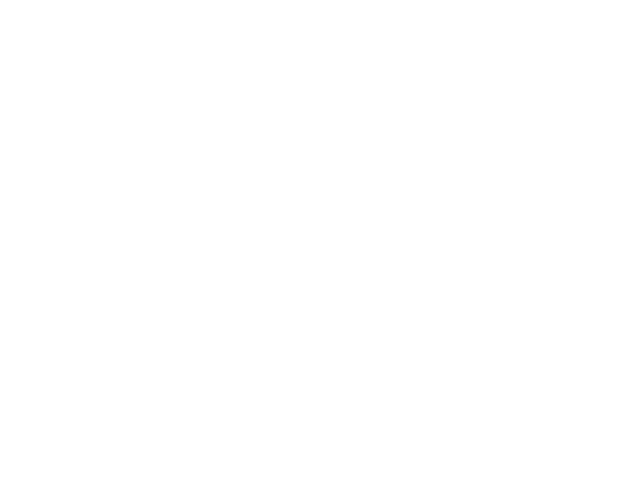

{'C': 0.05, 'delta': 9.042145593869732, 'sigma': 1.8044065649854202}

Solving the soft margin problem!
     pcost       dcost       gap    pres   dres
 0: -1.6430e+00 -9.5203e+01  6e+02  3e+00  5e-16
 1: -1.5886e+00 -4.8610e+01  5e+01  3e-02  6e-16
 2: -1.5116e+00 -2.7753e+00  1e+00  4e-04  6e-16
 3: -1.6239e+00 -2.0169e+00  4e-01  2e-05  5e-16
 4: -1.6611e+00 -1.8024e+00  1e-01  4e-06  4e-16
 5: -1.6774e+00 -1.7178e+00  4e-02  5e-07  4e-16
 6: -1.6832e+00 -1.6913e+00  8e-03  2e-16  5e-16
 7: -1.6850e+00 -1.6872e+00  2e-03  2e-16  5e-16
 8: -1.6856e+00 -1.6861e+00  5e-04  7e-16  5e-16
 9: -1.6857e+00 -1.6859e+00  3e-04  2e-16  4e-16
10: -1.6858e+00 -1.6858e+00  3e-05  3e-16  4e-16
11: -1.6858e+00 -1.6858e+00  4e-06  3e-16  4e-16
12: -1.6858e+00 -1.6858e+00  5e-08  5e-16  5e-16
Optimal solution found.
{'x': <203x1 matrix, tc='d'>, 'y': <1x1 matrix, tc='d'>, 's': <406x1 matrix, tc='d'>, 'z': <406x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 4.863632035975618e-08, 'relative gap': 2.8850

<IPython.core.display.Javascript object>


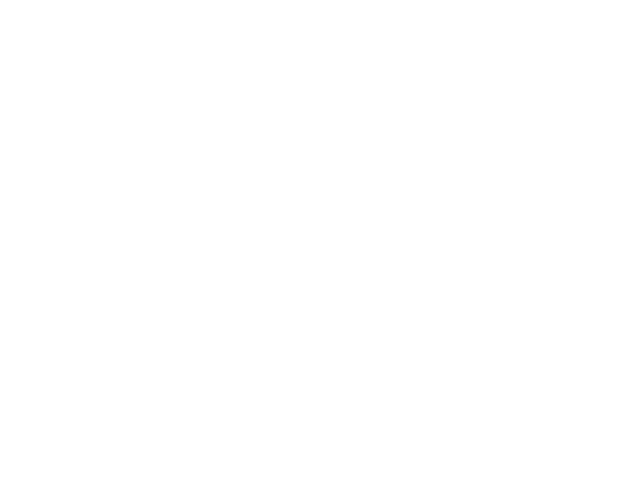

In [4]:
%matplotlib notebook

#Define model
svdd_test = RSVDD('gaussian', C = 0.05, delta = 2, sigma = 0.1)

#optimise the parameters
opt_params = svdd_test.optimise_parameters(X, y = labels, sigma_low = 1e-4, C_opt = True, N_iter = 10, plot_flag = True)
print(opt_params)

#set params
svdd_test.set_params(opt_params)

#fit model
svdd_test.fit(X)

plt.figure()
plt.scatter(np.arange(len(svdd_test.alphas)), svdd_test.alphas)
plt.plot([0, len(svdd_test.alphas)], [svdd_test.C] * 2, "r--")
plt.plot([0, len(svdd_test.alphas)], [svdd_test.C * svdd_test.delta] * 2, "k--")
plt.show()

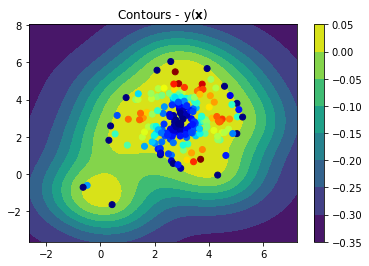

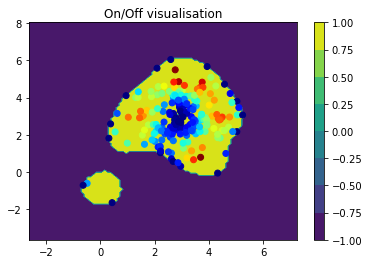

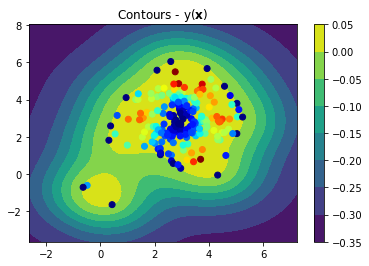

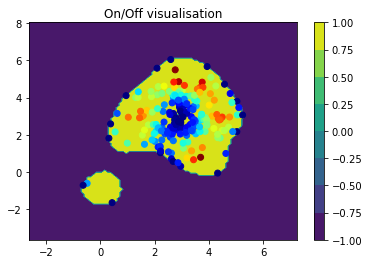

In [6]:
%matplotlib inline

N_grid = 100
X_m, Y_m = np.meshgrid(np.linspace(np.min(X[:, 0]) - 2, np.max(X[:, 0]) + 2, N_grid), 
                       np.linspace(np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2, N_grid))

X_grid = np.hstack((X_m.reshape(-1, 1), Y_m.reshape(-1, 1)))

Z1 = svdd_test.predict(X_grid, lower = True)
Z2 = svdd_test.predict(X_grid, lower = False)

plt.figure()
plt.contourf(X_m, Y_m, Z1.reshape(N_grid, N_grid))
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c = svdd_test.predict(X, lower = True), cmap = plt.cm.jet)
#plt.xlabel()
#plt.ylabel()
plt.title(r"Contours - y($\mathbf{x}$)")
plt.show()

plt.figure()
plt.contourf(X_m, Y_m, np.sign(Z1.reshape(N_grid, N_grid)))
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c = svdd_test.predict(X, lower = True), cmap = plt.cm.jet)
#plt.xlabel()
#plt.ylabel()
plt.title("On/Off visualisation")
plt.show()

plt.figure()
plt.contourf(X_m, Y_m, Z2.reshape(N_grid, N_grid))
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c = svdd_test.predict(X, lower = False), cmap = plt.cm.jet)
#plt.xlabel()
#plt.ylabel()
plt.title(r"Contours - y($\mathbf{x}$)")
plt.show()

plt.figure()
plt.contourf(X_m, Y_m, np.sign(Z2.reshape(N_grid, N_grid)))
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], c = svdd_test.predict(X, lower = False), cmap = plt.cm.jet)
#plt.xlabel()
#plt.ylabel()
plt.title("On/Off visualisation")
plt.show()